In [1]:
import os
os.environ["PYTHONPATH"] = ""
os.environ["PATH"] = "/opt/app-root/src/for_snudda/bin:" + os.environ["PATH"]

In [3]:
cd "/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda"

/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda


## Simulate the network

Set up striatal network of 100 neurons. This writes the configuration file `network-config.json` (see the last line of the output). Option `--overwrite` allows to overwrite the network's directory if it exists.

In [3]:
!snudda init networks/tinySim --size 100 --overwrite

Creating config file
Network path: networks/tinySim
CreateConfig
Using 1 functional channels
Adding Striatum with 100 neurons
Using cube for striatum
Creating cube mesh
File: networks/tinySim/mesh/Striatum-cube-mesh-0.00010749824478388102.obj
Centre: [0.00354  0.004645 0.005081]
Side: 0.00010749824478388102
Description: Striatum cube mesh, centre = [0.00354  0.004645 0.005081], side = 0.00010749824478388102
Adding neurons: FSN from dir /mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/data/cellspecs-v2/fs
Adding neurons: dSPN from dir /mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/data/cellspecs-v2/dspn
Adding neurons: iSPN from dir /mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/data/cellspecs-v2/ispn
Adding neurons: ChIN from dir /mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/data/cellspecs-v2/chin
Checking boundaries, to make sure P is not too high
LTS axon density P([-0.0002]

Place the neurons based on the network config file. Positions are written to the file `network-neuron-positions.hdf5`.

In [4]:
!snudda place networks/tinySim

Placing neurons
Network path: networks/tinySim
Using runID = 15
Using hdf5 version: latest
Parsing configuration file networks/tinySim/network-config.json
Using meshBinWidth 0.00010749824478388102
Cube mesh, switching to serial processing.
Found old cache file (networks/tinySim/mesh/Striatum-cube-mesh-0.00010749824478388102.obj-107-cache.pickle), ignoring.
Running in serial
Voxel mask: 5x5x5
Processing x = 0
Processing x = 1
Processing x = 2
Processing x = 3
Processing x = 4
Fraction of border voxels: 0.0
Saving mesh cache file networks/tinySim/mesh/Striatum-cube-mesh-0.00010749824478388102.obj-107-cache.pickle
Calculation time: 0.013948312029242516 s
Setup voxel list
Setup place neurons
Update padding mask
Regenerating new random pool
Setup done
Inner voxel bin volume: 0.0 mm³
Using dimensions from config file
Adding: 1 FSN_0
Found cache file: /mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/data/cellspecs-v2/fs/str-fs-e160628_FS2-mMTC180800A-IDB-v20190226/MT

Detect the apposition points where axons and dendrites of different neurons overlap.  
**NOTE**: this takes about 10 minutes on a common desktop.

In [5]:
!snudda detect networks/tinySim

Touch detection
Network path: networks/tinySim
Using runID = 16
Already have a log file setup, ignoring
Using hdf5 driver version: latest
{'total': 32779652, 'free': 25236012, 'used': 7543640}
Each hyper voxel has 100 x 100 x 100 voxels
Touch detecting all volumes
Removing old files networks/tinySim/network-putative-synapses-MERGED.hdf5
Removing old files networks/tinySim/network-pruned-synapses.hdf5
Loading from networks/tinySim/network-config.json
Reading prototype for: FSN_0
Found cache file: /mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/data/cellspecs-v2/fs/str-fs-e160628_FS2-mMTC180800A-IDB-v20190226/MTC180800A-IDB-cor-rep-cache.pickle
Reading prototype for: dSPN_0
Found cache file: /mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/data/cellspecs-v2/dspn/str-dspn-e150602_c1_D1-mWT-0728MSN01-v20190508/WT-0728MSN01-cor-rep-ax-cache.pickle
Reading prototype for: dSPN_1
Found cache file: /mnt/user/drive/Shared with groups/BasalGang

Prune the detected appositions to get the set of synapses.

In [6]:
!snudda prune networks/tinySim

Prune synapses
Network path: networks/tinySim
Using runID = 17
preMergeOnly : False
Setting random seed: None
Using hdf5 driver sec2, latest version
Opening work history file: networks/tinySim/log/network-detect-worklog.hdf5
Using default scratch path: networks/tinySim//temp/
Checking for merge file networks/tinySim//network-putative-synapses-MERGED.hdf5
Running merge in serial
Doing bigMerge (lookup) for synapses
[0, 521, 1048576, 0.75]
(0, 521, 20971520, 0.75)
Opening voxel file: networks/tinySim//voxels/network-putative-synapses-21.hdf5
[0, 521, 20971520, 0.75]
Opening voxel file: networks/tinySim//voxels/network-putative-synapses-17.hdf5
[0, 521, 20971520, 0.75]
Opening voxel file: networks/tinySim//voxels/network-putative-synapses-5.hdf5
[0, 521, 20971520, 0.75]
Opening voxel file: networks/tinySim//voxels/network-putative-synapses-20.hdf5
[0, 521, 20971520, 0.75]
Opening voxel file: networks/tinySim//voxels/network-putative-synapses-1.hdf5
[0, 521, 20971520, 0.75]
Opening voxel f

Generate external input events for the network. A 1 second duration of the simulation is reserved.

In [7]:
!snudda input networks/tinySim --input snudda/data/config/input-tinytest-v6.json --time 1.0

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-eajauiri because the default path (/home/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
Setting up inputs, assuming input.json exists
Using runID = 18
Writing input spikes to networks/tinySim/input-spikes.hdf5
Time = 1.0
Setting random seed: None
Using hdf5 version latest
Loading HDF5-file: networks/tinySim/network-pruned-synapses.hdf5
Loading input configuration from snudda/data/config/input-tinytest-v6.json
Reading neuron postions
Loading networks/tinySim/network-neuron-positions.hdf5
No SlurmID set, using -1
Load done. 0.011600524187088013
Reading config file networks/tinySim/network-config.json
IPYTHON_PROFILE = None
No IPYTHON_PROFILE enviroment variable set, running in serial
Running makeChannelSpikeTrains
Running makeNeuronI

### Compile MOD files

In [5]:
#!nrnivmodl snudda/data/cellspecs-v2/mechanisms
!pwd

/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda


Run the simulation. Option `--time` defines duration of the simulation, in seconds. It can't be longer than the duration of the external input reserved above. Try 100 milliseconds for a very short simulation.  
**NOTE**: this takes about 15 minutes on a common desktop.

In [6]:
!snudda simulate networks/tinySim --time 0.1 --input networks/tinySim/input-spikes.hdf5 --voltOut networks/tinySim/simulation/volt.txt

--No graphics will be displayed.
Creating missing directory networks/tinySim/simulation
Created directory networks/tinySim/simulation
Using input file networks/tinySim/input-spikes.hdf5
args: Namespace(action='simulate', cont=False, disableConnection=None, disableGJ=False, h5legacy=False, hvsize=None, input='networks/tinySim/input-spikes.hdf5', inputFile=None, mechDir=None, mergeonly=False, nchannels=1, networkFile=None, overwrite=False, path='networks/tinySim', profile=False, recordGapJunctions=None, recordPointProcess=None, size=None, spikesOut=None, time=0.1, verbose=False, voltOut='networks/tinySim/simulation/volt.txt', volumeID=None)
Using networkFile: networks/tinySim/network-pruned-synapses.hdf5
Using inputFile: networks/tinySim/input-spikes.hdf5
Using logFile: networks/tinySim/log/network-simulation-log.txt
I am node 0
Worker 0: Loading network from networks/tinySim/network-pruned-synapses.hdf5
Loading networks/tinySim/network-pruned-synapses.hdf5
Loading config data from HDF5


## Plot simulation results

In [10]:
%matplotlib inline

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-xrwubmu8 because the default path (/home/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


See the spike raster plot for all cell types.

Loading networks/tinySim/network-pruned-synapses.hdf5
Loading config data from HDF5
99 neurons with 7065 synapses and 10000 gap junctions
Load done. 0.06508102640509605
Sort the traces
Sort the traces


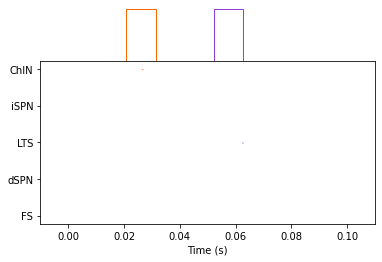

<Figure size 432x288 with 0 Axes>

Saving networks/tinySim/figs/network-output-spikes-666-colour.png


<Figure size 432x288 with 0 Axes>

In [11]:
from snudda.plotting.Network_plot_spike_raster import NetworkPlotSpikeRaster

fileName = "networks/tinySim/simulation/network-output-spikes-666.txt"
networkFile = "networks/tinySim/network-pruned-synapses.hdf5"
endTime = 0.1
npsr = NetworkPlotSpikeRaster(fileName,networkFile,skipTime=0.0,
                                  endTime=endTime,
                                  typeOrder=["FSN","dSPN","LTS","iSPN","ChIN"])

Check voltage traces for randomly the selected cells.

Unable to guess ID, using 666.
Loading networks/tinySim/network-pruned-synapses.hdf5
Loading config data from HDF5
99 neurons with 7065 synapses and 10000 gap junctions
Load done. 0.04607537016272545
!!! Excluding first 0s from the plot
Plotting traces: [2, 3, 4, 5, 6]
Plotted 5 traces (total 99)


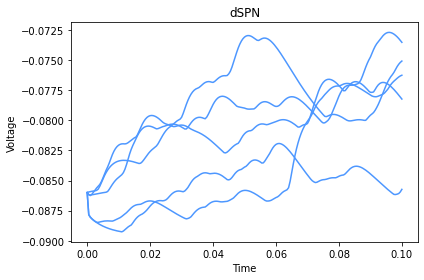

<Figure size 432x288 with 0 Axes>

Saving to figure networks/tinySim/figs/Network-spikes-666-dSPN-colour.png
!!! Excluding first 0s from the plot
Plotting traces: [0, 1, 7, 9, 12]
Plotted 5 traces (total 99)


<Figure size 432x288 with 0 Axes>

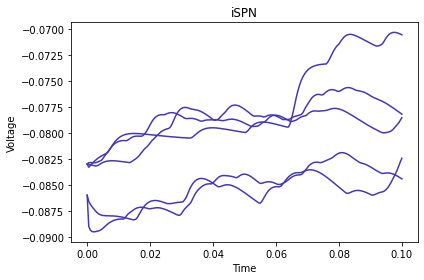

<Figure size 432x288 with 0 Axes>

Saving to figure networks/tinySim/figs/Network-spikes-666-iSPN-colour.png
!!! Excluding first 0s from the plot
Plotting traces: [39]
Plotted 1 traces (total 99)


<Figure size 432x288 with 0 Axes>

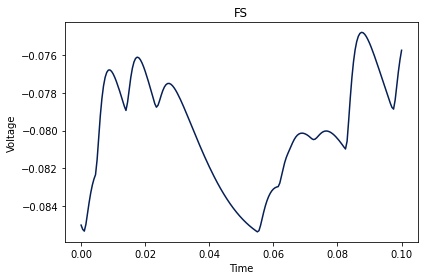

<Figure size 432x288 with 0 Axes>

Saving to figure networks/tinySim/figs/Network-spikes-666-FSN-colour.png
!!! Excluding first 0s from the plot
Plotting traces: [18]
Plotted 1 traces (total 99)


<Figure size 432x288 with 0 Axes>

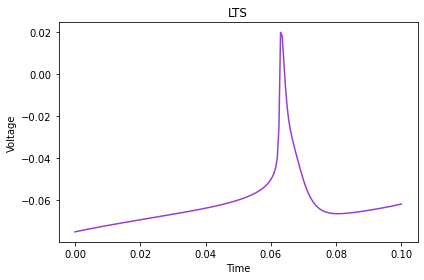

<Figure size 432x288 with 0 Axes>

Saving to figure networks/tinySim/figs/Network-spikes-666-LTS-colour.png
!!! Excluding first 0s from the plot
Plotting traces: [86]
Plotted 1 traces (total 99)


<Figure size 432x288 with 0 Axes>

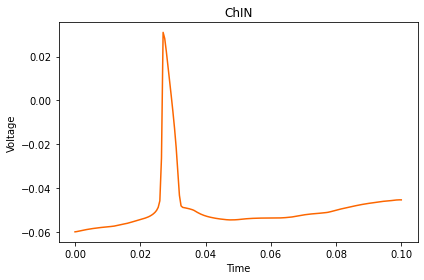

<Figure size 432x288 with 0 Axes>

Saving to figure networks/tinySim/figs/Network-spikes-666-ChIN-colour.png


<Figure size 432x288 with 0 Axes>

In [12]:
from snudda.plotting.Network_plot_traces import NetworkPlotTraces

plotOffset = 0
skipTime = 0
nTracesMax = 5

fileName = "networks/tinySim/simulation/volt.txt"
npt = NetworkPlotTraces(fileName,networkFile)
networkFile = "networks/tinySim/network-pruned-synapses.hdf5"
    
npt.plotTraceNeuronType(neuronType="dSPN",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)
npt.plotTraceNeuronType(neuronType="iSPN",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)
npt.plotTraceNeuronType(neuronType="FSN",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)
npt.plotTraceNeuronType(neuronType="LTS",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)
npt.plotTraceNeuronType(neuronType="ChIN",nTraces=nTracesMax,offset=plotOffset,skipTime=skipTime)


Analyze spatial distribution of the synapses for each cell type.

Loading networks/tinySim/network-pruned-synapses.hdf5
Assuming volume type: cube[cube or full]
Only using 20000neurons of the connection data
Loading networks/tinySim/network-pruned-synapses.hdf5
Loading config data from HDF5
99 neurons with 7065 synapses and 10000 gap junctions
Load done. 0.03758561611175537
Number of neurons: 99
Synapse row 0 - 0.0 % time: 0.0026726089417934418 seconds
Created connection matrix 0.014126364141702652 seconds
GJ row : 0 - 0.0 %  time : 0.0013394448906183243 seconds
Created gap junction connection matrix 0.03580049052834511 seconds
Creating population dictionary
Done.
!!! Setting sideLen to None
Calculating synapse distance histogram
Creating dist histogram
nSynapses = 7065, at 0
Created distance histogram (optimised) in 0.015803202986717224 seconds
Saving cache to networks/tinySim/network-pruned-synapses.hdf5-cache
Plotting connection probability dSPN to iSPN (synapses)
Centering in None : Keeping 48/48
Counting connections


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


Requested: 10000000.0 calculated [2004.]
Rejected (too large z-depth): 300
P(d<5e-05)=0.06480648064806481
P(d<0.0001)=0.05616850551654965


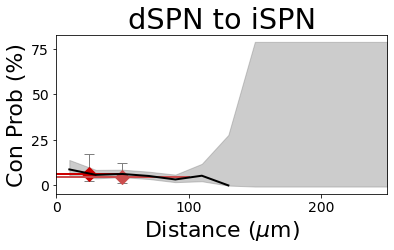

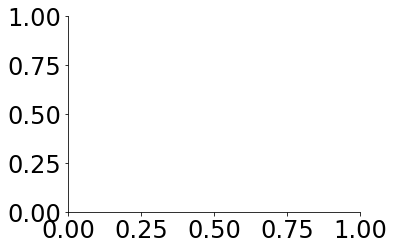

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-dSPN-to-iSPN-synapses-2D-dist.pdf
Plotting connection probability dSPN to dSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [1966.]
Rejected (too large z-depth): 290
P(d<5e-05)=0.27644710578842313
P(d<0.0001)=0.25435005117707266


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


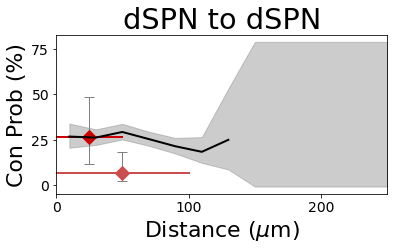

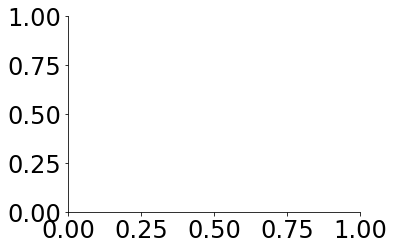

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-dSPN-to-dSPN-synapses-2D-dist.pdf
Plotting connection probability iSPN to dSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [2004.]
Rejected (too large z-depth): 300
P(d<5e-05)=0.2988298829882988
P(d<0.0001)=0.27382146439317956


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


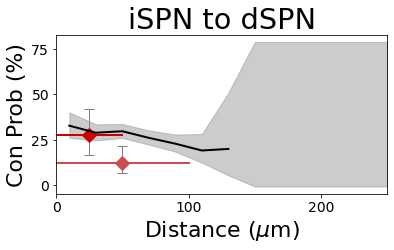

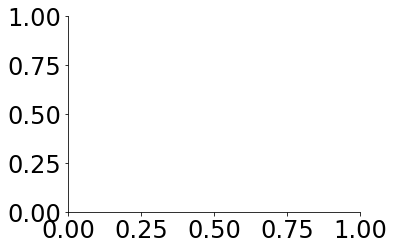

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-iSPN-to-dSPN-synapses-2D-dist.pdf
Plotting connection probability iSPN to iSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [1962.]
Rejected (too large z-depth): 294
P(d<5e-05)=0.3423728813559322


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


P(d<0.0001)=0.32256410256410256


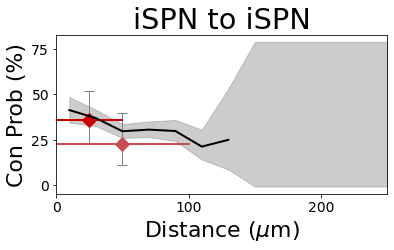

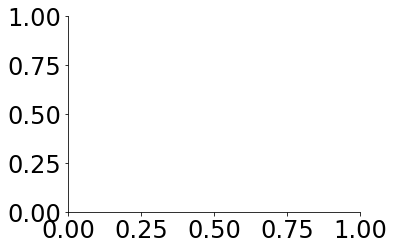

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-iSPN-to-iSPN-synapses-2D-dist.pdf
Plotting connection probability FSN to iSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [31.]
Rejected (too large z-depth): 17
P(d<0.0001)=0.3870967741935484
P(d<0.00015)=0.3870967741935484
P(d<0.00025)=0.3870967741935484


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


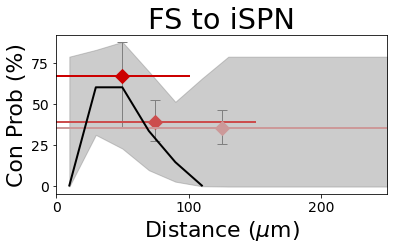

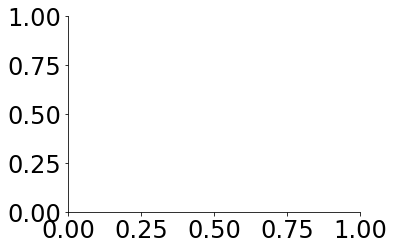

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-FSN-to-iSPN-synapses-2D-dist.pdf
Plotting connection probability FSN to dSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [32.]
Rejected (too large z-depth): 16
P(d<0.0001)=0.4375
P(d<0.00015)=0.4375
P(d<0.00025)=0.4375


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


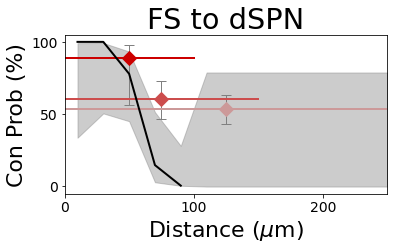

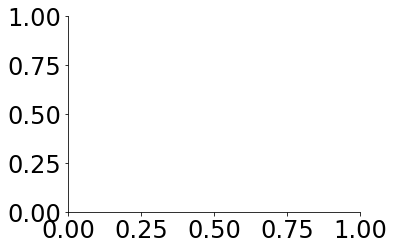

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-FSN-to-dSPN-synapses-2D-dist.pdf
Plotting connection probability FSN to FSN (synapses)
Centering in None : Keeping 1/1
Counting connections
Requested: 10000000.0 calculated [0.]
Rejected (too large z-depth): 0
P(d<0.00025)=0.0


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


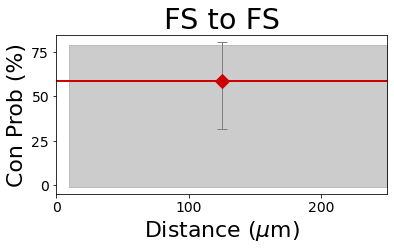

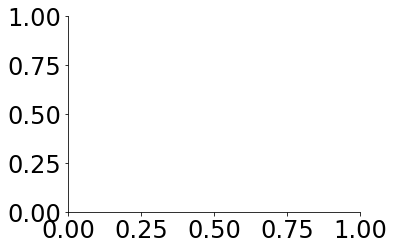

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-FSN-to-FSN-synapses-2D-dist.pdf
Plotting connection probability FSN to FSN (gapjunctions)
Centering in None : Keeping 1/1
Counting connections
Requested: 10000000.0 calculated [0.]
Rejected (too large z-depth): 0
P(d<0.00025)=0.0
P(d<0.00025)=0.0


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


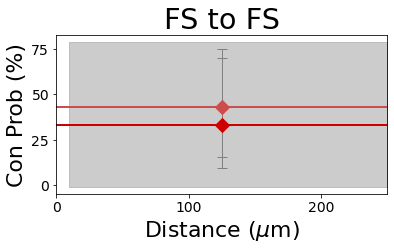

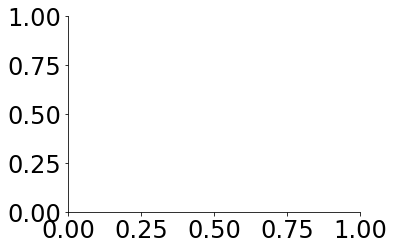

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-FSN-to-FSN-gapjunctions-2D-dist.pdf
Plotting connection probability LTS to dSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [33.]
Rejected (too large z-depth): 15
P(d<0.00025)=0.24242424242424243


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


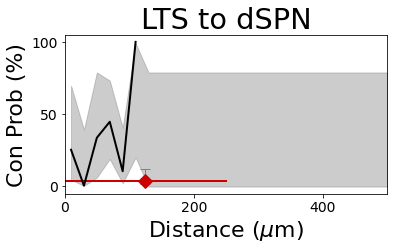

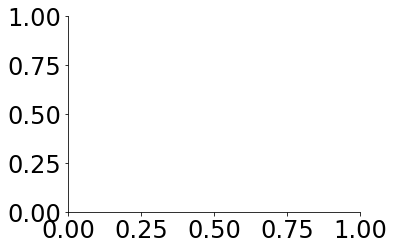

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-LTS-to-dSPN-synapses-2D-dist.pdf
Plotting connection probability LTS to iSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [35.]
Rejected (too large z-depth): 13
P(d<0.00025)=0.11428571428571428


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


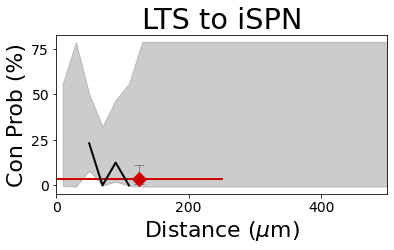

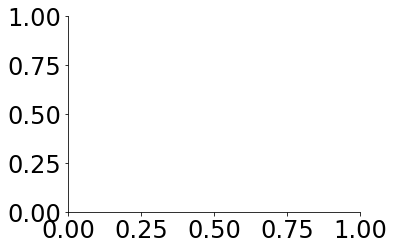

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-LTS-to-iSPN-synapses-2D-dist.pdf
Plotting connection probability FSN to LTS (synapses)
Centering in None : Keeping 1/1
Counting connections
Requested: 10000000.0 calculated [1.]
Rejected (too large z-depth): 0
P(d<0.00025)=1.0


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


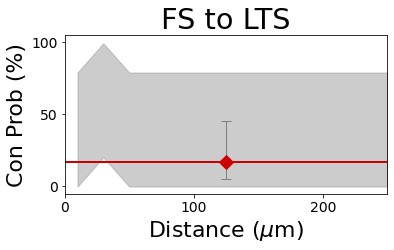

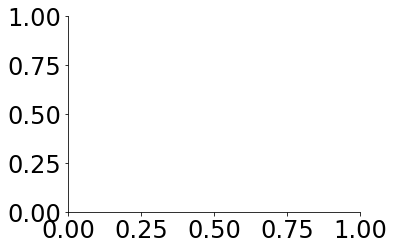

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-FSN-to-LTS-synapses-2D-dist.pdf
Plotting connection probability ChIN to LTS (synapses)
Centering in None : Keeping 1/1
Counting connections
Requested: 10000000.0 calculated [1.]
Rejected (too large z-depth): 0


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


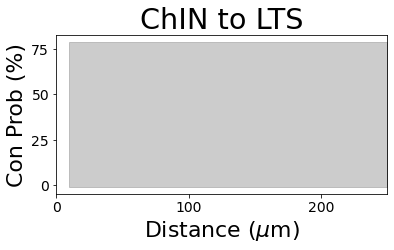

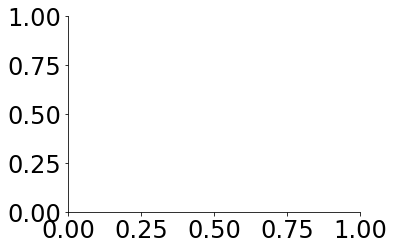

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-ChIN-to-LTS-synapses-2D-dist.pdf
Plotting connection probability ChIN to iSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [48.]
Rejected (too large z-depth): 0
P(d<0.00025)=0.0


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


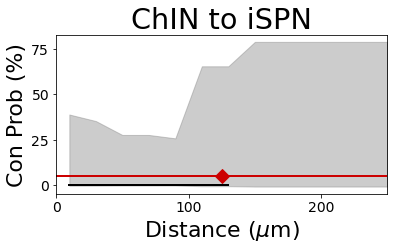

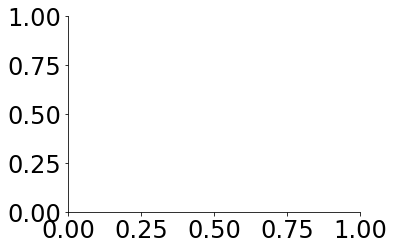

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-ChIN-to-iSPN-synapses-2D-dist.pdf
Plotting connection probability ChIN to dSPN (synapses)
Centering in None : Keeping 48/48
Counting connections
Requested: 10000000.0 calculated [48.]
Rejected (too large z-depth): 0
P(d<0.00025)=0.0


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


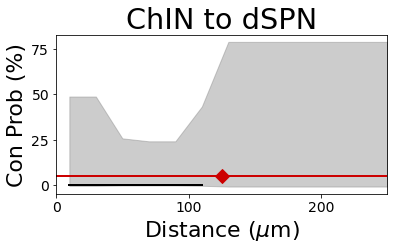

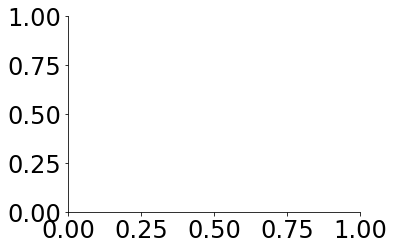

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-ChIN-to-dSPN-synapses-2D-dist.pdf
Plotting connection probability LTS to ChIN (synapses)
Centering in None : Keeping 1/1
Counting connections
Requested: 10000000.0 calculated [1.]
Rejected (too large z-depth): 0


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


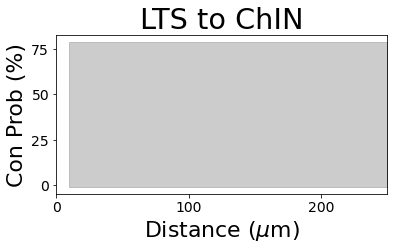

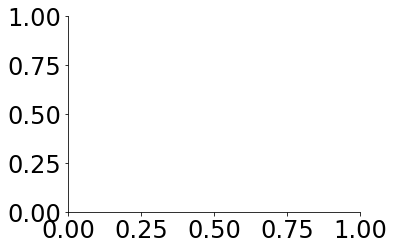

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-LTS-to-ChIN-synapses-2D-dist.pdf
Plotting connection probability ChIN to FSN (synapses)
Centering in None : Keeping 1/1
Counting connections
Requested: 10000000.0 calculated [1.]
Rejected (too large z-depth): 0


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


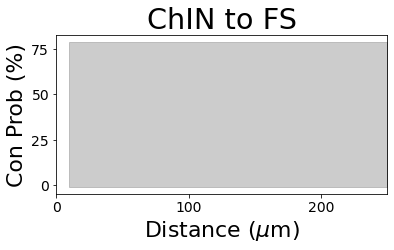

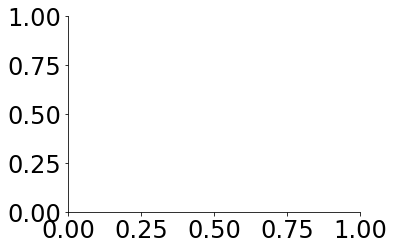

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-ChIN-to-FSN-synapses-2D-dist.pdf
Plotting connection probability dSPN to ChIN (synapses)
Centering in None : Keeping 1/1
Counting connections
Requested: 10000000.0 calculated [48.]
Rejected (too large z-depth): 0


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


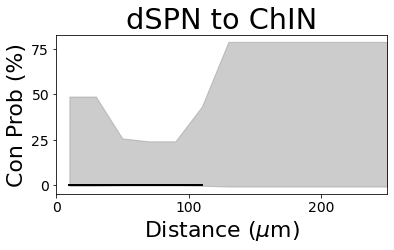

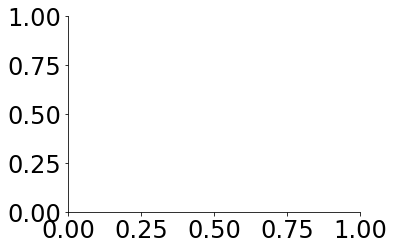

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-dSPN-to-ChIN-synapses-2D-dist.pdf
Plotting connection probability iSPN to ChIN (synapses)
Centering in None : Keeping 1/1
Counting connections
Requested: 10000000.0 calculated [48.]
Rejected (too large z-depth): 0


/mnt/user/drive/Shared with groups/BasalGanglia-Reproducible/Snudda/snudda/analyse.py:1462: RuntimeWarning: invalid value encountered in true_divide
  Pcon = np.divide(countCon,countAll)


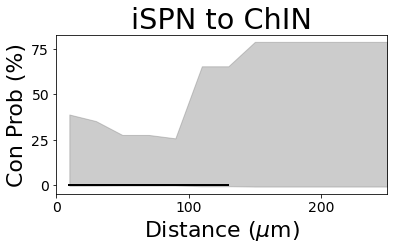

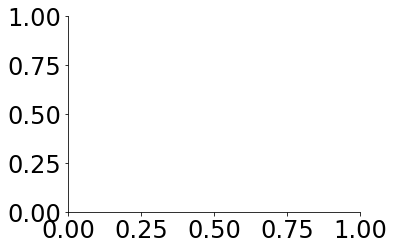

Wrote networks/tinySim/figures/Network-distance-dependent-connection-probability-iSPN-to-ChIN-synapses-2D-dist.pdf


In [13]:
  from snudda.analyse_striatum import SnuddaAnalyseStriatum
  nas = SnuddaAnalyseStriatum("networks/tinySim",volumeType="cube")
    
  plotHenrike = True
  plotChIN = True
  plotLTS = True

  dist3D = False
  #dist3D = True


  if(plotHenrike):

    yMaxH = None #0.5

    nas.plotConnectionProbability("dSPN","iSPN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[50e-6,100e-6],\
                                  expData=[3/47.0,3/66.0],
                                  expDataDetailed=[(3,47),(3,66)],
                                  yMax=yMaxH)
    nas.plotConnectionProbability("dSPN","dSPN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[50e-6,100e-6],\
                                  expData=[5/19.0,3/43.0],
                                  expDataDetailed=[(5,19),(3,43)],
                                  yMax=yMaxH)    
    nas.plotConnectionProbability("iSPN","dSPN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[50e-6,100e-6],\
                                  expData=[13/47.0,10/80.0],
                                  expDataDetailed=[(13,47),(10,80)],
                                  yMax=yMaxH)
    nas.plotConnectionProbability("iSPN","iSPN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[50e-6,100e-6],\
                                  expData=[14/39.0,7/31.0],
                                  expDataDetailed=[(14,39),(7,31)],
                                  yMax=yMaxH)


  if(True):

    nas.plotConnectionProbability("FSN","iSPN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[100e-6, 150e-6, 250e-6],
                                  expData=[6/9.0, 21/54.0, 27/77.0],
                                  expDataDetailed=[(6,9),(21,54),(27,77)],
                                  yMax=None)

    nas.plotConnectionProbability("FSN","dSPN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[100e-6, 150e-6, 250e-6],
                                  expData=[8/9.0, 29/48.0, 48/90.0],
                                  expDataDetailed=[(8,9),(29,48),(48,90)],
                                  yMax=None)

    
    #  Gittis,...,Kreitzer 2010 (p2228) -- 7/12 (and 3/4 reciprocal) -- distance?
    # FS->FS synapses weaker, 1.1 +/- 1.5nS  
    nas.plotConnectionProbability("FSN","FSN", \
                                  dist3D=dist3D, \
                                  expMaxDist=[250e-6],\
                                  expData=[7/12.0],
                                  expDataDetailed=[(7,12)] )
    
    # Koos & Tepper 1999, 2/6
    nas.plotConnectionProbability("FSN","FSN", \
                                  dist3D=dist3D ,
                                  connectionType="gapjunctions",
                                  expMaxDist=[250e-6,250e-6],
                                  expData=[2/6.0,3/7.0],
                                  expDataDetailed=[(2,6),(3,7)],)



  if(plotLTS):

    # 3/21 LTS->MS, Basal Ganglia book --- distance??
    # Ibanez-Sandoval, ..., Tepper  2011 3/21 -- if patching around visual axon
    # but 2/60 when patching blind
    nas.plotConnectionProbability("LTS","dSPN", \
                                  dist3D=dist3D,
                                  expMaxDist=[250e-6],
                                  expData=[2/60.0],
                                  expDataDetailed=[(2,60)],
                                  xMax=500)

    nas.plotConnectionProbability("LTS","iSPN", \
                                  dist3D=dist3D,
                                  expMaxDist=[250e-6],
                                  expData=[2/60.0],
                                  expDataDetailed=[(2,60)],
                                  xMax=500)

  
    # Silberberg et al 2013, 2/12 FS-> LTS connected --- distance??
    nas.plotConnectionProbability("FSN","LTS", \
                                  dist3D=dist3D,
                                  expMaxDist=[250e-6],
                                  expData=[2.0/12],
                                  expDataDetailed=[(2,12)])

  nas.plotConnectionProbability("ChIN","LTS", \
                                dist3D=dist3D)
  
  # Janicova 2015?? --- distance??!
  nas.plotConnectionProbability("ChIN","iSPN", \
                                dist3D=dist3D,
                                expMaxDist=[250e-6],
                                expData=[0.05])
    
  nas.plotConnectionProbability("ChIN","dSPN", \
                                dist3D=dist3D,
                                expMaxDist=[250e-6],
                                expData=[0.05])
  
  if(True):
    nas.plotConnectionProbability("LTS","ChIN", \
                                  dist3D=dist3D )

  if(plotChIN):    
    nas.plotConnectionProbability("ChIN","FSN", \
                                  dist3D=dist3D,
                                  yMax=None)

    nas.plotConnectionProbability("dSPN","ChIN", \
                                  dist3D=dist3D)
    nas.plotConnectionProbability("iSPN","ChIN", \
                                  dist3D=dist3D)



Simulation analysis plots are saved as PDF files in the directory `networks/tinySim/figures`.

In [14]:
!ls networks/tinySim/figures/*.pdf

networks/tinySim/figures/Network-distance-dependent-connection-probability-ChIN-to-dSPN-synapses-2D-dist.pdf
networks/tinySim/figures/Network-distance-dependent-connection-probability-ChIN-to-FSN-synapses-2D-dist.pdf
networks/tinySim/figures/Network-distance-dependent-connection-probability-ChIN-to-iSPN-synapses-2D-dist.pdf
networks/tinySim/figures/Network-distance-dependent-connection-probability-ChIN-to-LTS-synapses-2D-dist.pdf
networks/tinySim/figures/Network-distance-dependent-connection-probability-dSPN-to-ChIN-synapses-2D-dist.pdf
networks/tinySim/figures/Network-distance-dependent-connection-probability-dSPN-to-dSPN-synapses-2D-dist.pdf
networks/tinySim/figures/Network-distance-dependent-connection-probability-dSPN-to-iSPN-synapses-2D-dist.pdf
networks/tinySim/figures/Network-distance-dependent-connection-probability-FSN-to-dSPN-synapses-2D-dist.pdf
networks/tinySim/figures/Network-distance-dependent-connection-probability-FSN-to-FSN-gapjunctions-2D-dist.pdf
networks/tinySim/fig

## Closing remarks

This example creates a very small striatal network. Size of the network and other parameters can be adjusted. For more information, please see https://github.com/Hjorthmedh/Snudda/wiki/Developer-Installation-Guide.

Questions and suggestions related to *Snudda* simulations, please address to the main developer, *Johannes Hjorth* [hjorth@kth.se](mailto:hjorth@kth.se).